In [1]:
from sklearn.model_selection import train_test_split
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

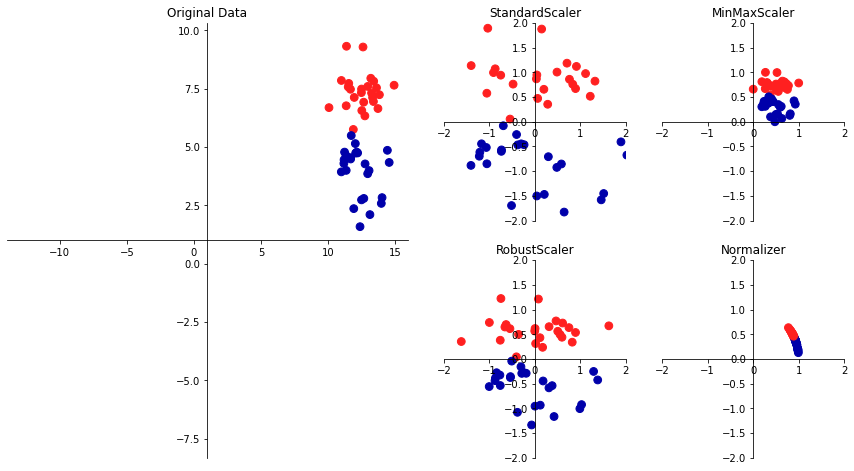

In [2]:
mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [5]:
X_train_scaled = scaler.transform(X_train)

print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(426, 30)
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [6]:
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

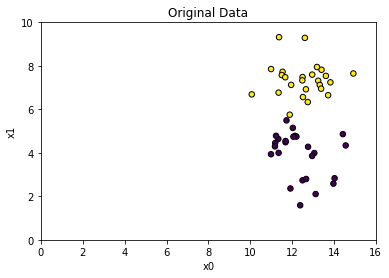

In [8]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


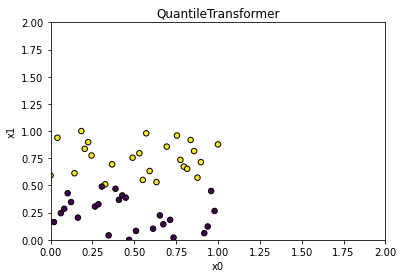

In [9]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 2)
plt.xlabel('x0')
plt.ylim(0, 2)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

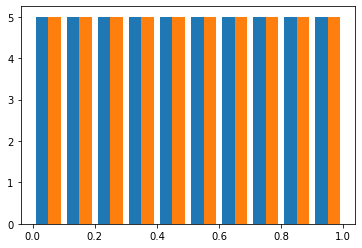

In [10]:
plt.hist(X_trans)
plt.show()

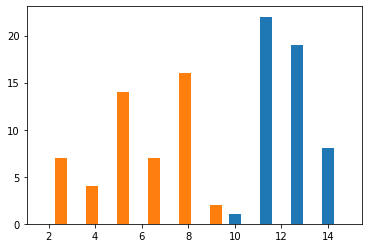

In [11]:
plt.hist(X)
plt.show()

In [12]:
print(scaler.quantiles_.shape)

(50, 2)


In [13]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [14]:
x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


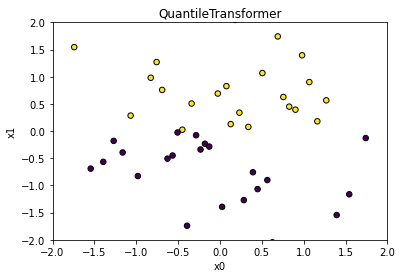

In [15]:
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-2, 2)
plt.xlabel('x0')
plt.ylim(-2, 2)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

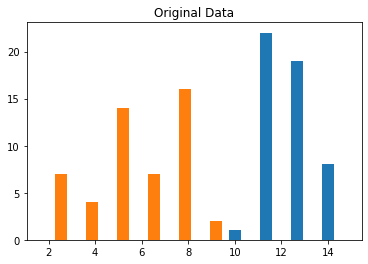

/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


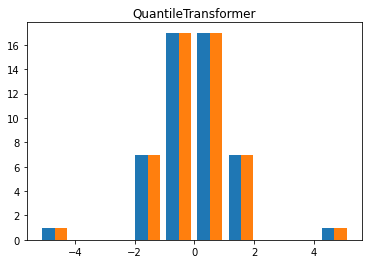

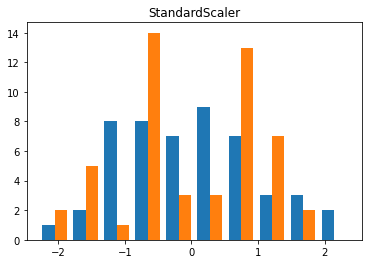

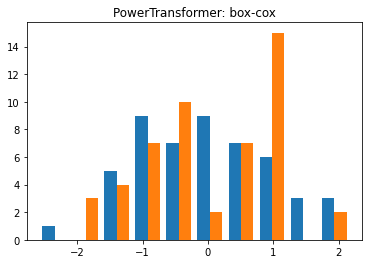

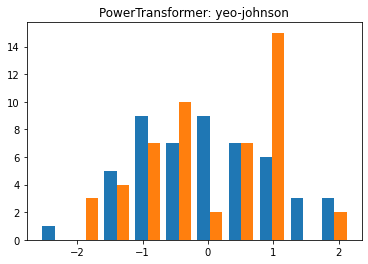

In [16]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer: box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer: yeo-johnson')
plt.show()

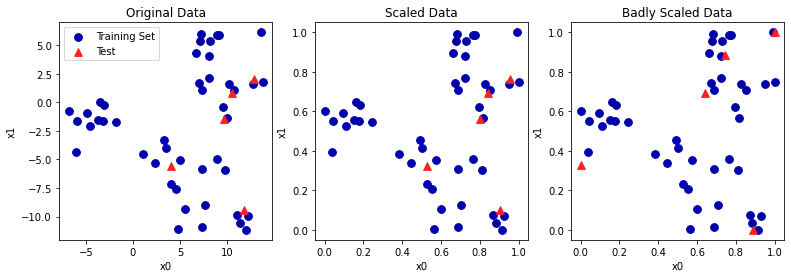

In [17]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
               c=mglearn.cm2.colors[0], label='Training Set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
               c=mglearn.cm2.colors[1], label='Test', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original Data')

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
               c=mglearn.cm2.colors[0], label='Training Set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
               c=mglearn.cm2.colors[1], label='Test', s=60)
axes[1].set_title('Scaled Data')

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
               c=mglearn.cm2.colors[0], label='Training Set', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
               c=mglearn.cm2.colors[1], label='Test', s=60)
axes[2].set_title('Badly Scaled Data')

for ax in axes:
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')

In [18]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.9440559440559441


In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print(svm.score(X_test_scaled, y_test))

0.965034965034965


In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print(svm.score(X_test_scaled, y_test))

0.958041958041958
